In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

In [4]:
# Make simulated background

bkgd = stats.poisson.rvs(mu=100, size=1000000)

In [5]:
# Problem 1

sigma5_prob = stats.norm.sf(5, loc=0, scale=1)
threshold = stats.poisson.isf(sigma5_prob, mu=100)
print(threshold)

154.0


Text(0, 0.5, 'Probability Density')

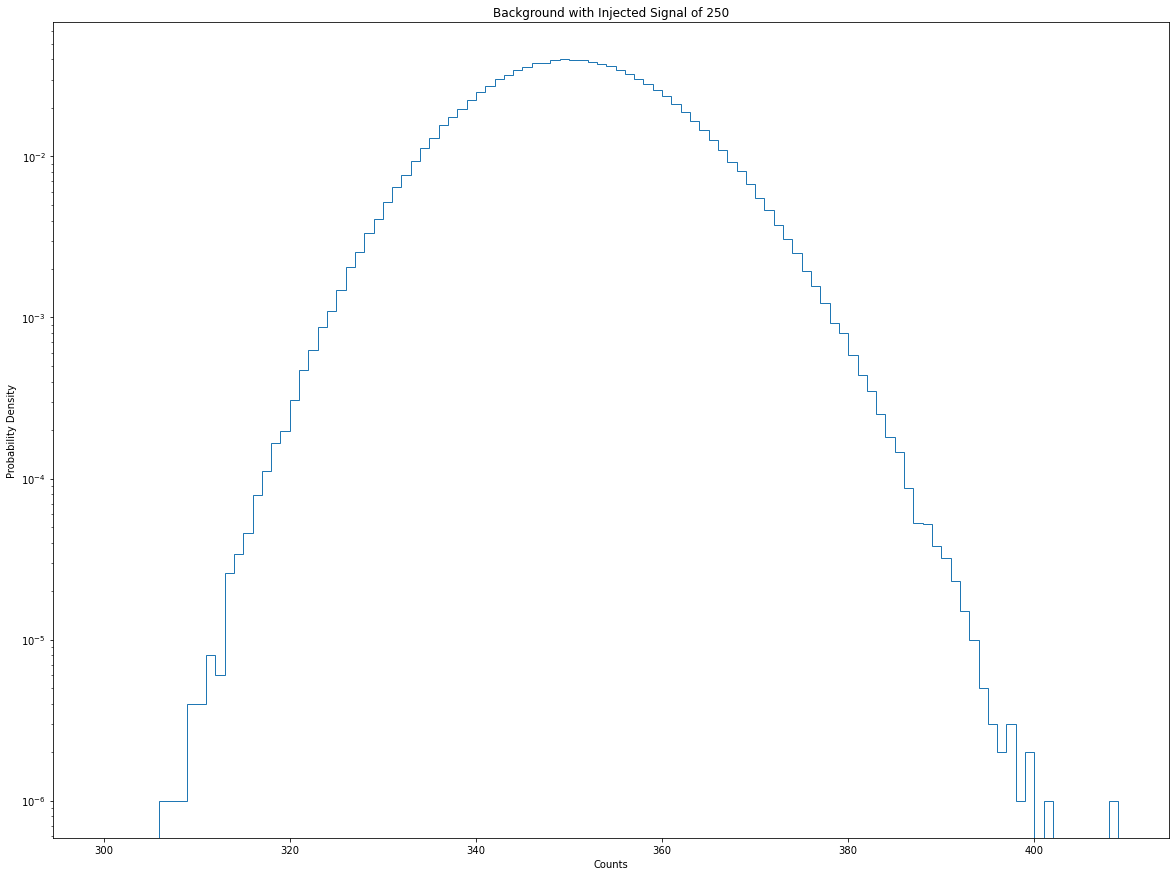

In [6]:
# Problem 2

# Choose signal value of 250

signal = 250
data = bkgd + signal
hist = np.histogram(bkgd+signal, bins=range(300, 410), density=False)[0]
sumbins = hist.sum()
x=range(300,410)
normalized = hist/sumbins
plt.stairs(normalized, x)
plt.yscale('log')
plt.title('Background with Injected Signal of 250')
plt.xlabel('Counts')
plt.ylabel('Probability Density')

Problem 2.A

The plot above shows the probability density function of different observed values with an injected signal of 250. The shape of this distribution is still a poisson, as the backgrouns is a poisson distribution, and we are only adding a constant number to the background.

The histogram shows the probabilities of observing different values from the background given the true signal is 250.

Problem 2.B

The observed signal is biased. The observed signal cannot be weaker than the injected signal, as the true signal value is not present in the data. All values within the histogram are stronger signals than the true injected one, so it must be stronger. 

For a poisson distribution in the limit that mu -> $\infty$, it will begin to take the shape of a gaussian distribution which is a symmetric distribution. The shape of the above histogram follows the shape of a gaussian distribution very closely, and appears to be symmetric, so I believe it is a safe estimate to say that the distribution is symmetric.

Problem 3.A



<ipython-input-7-68d7254ea6b1>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

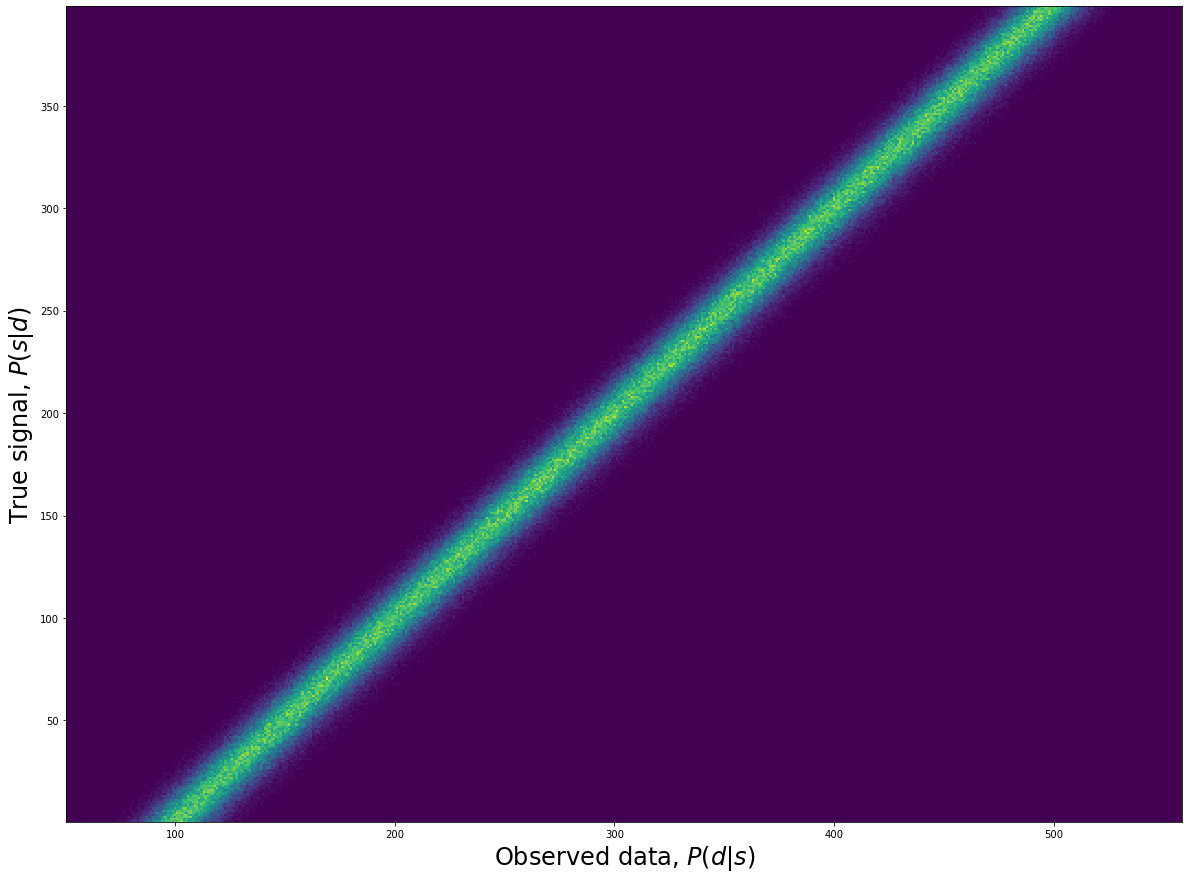

In [7]:
# Problem 3.A

signals = np.random.uniform(low=0, high=400, size=1000000)
data = bkgd + signals

signaledges = np.array(range(0,400))
dataedges = np.array(range(50,560))

Psd, temp, temp2= np.histogram2d(data,signals, bins=[dataedges,signaledges], density=False)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Above I am simulating how the probability distribution of observed data points resulting in an injected true signal changes, as the injected signal changes. Each distribution can be found by taking a vertical slice of the 2D histogram at a signal value on the y axis.. 

The above histogram also simulates the probability distribution of what injected signal values can result in an observed data value for multiple values. These distributions can be found by taking vertical slices of the histogram at specific points on the x axis.

This histogram gives a visual representation of Baye's Theorem, as You can use the slices to solve for Baye's theroem when looking for either P(d|s) or P(s|d).

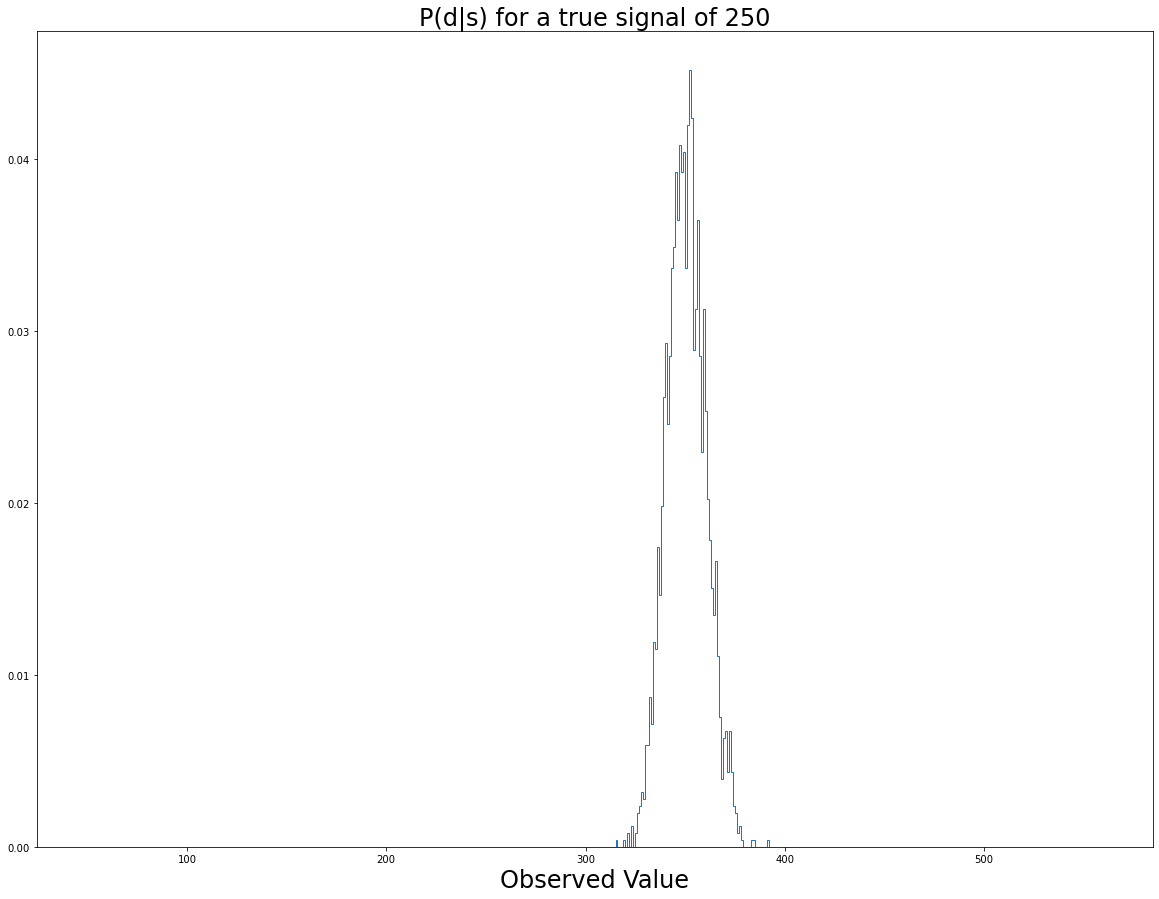

In [8]:
# Problem 3.B

cut = Psd[:,250]
sumbins=cut.sum()
normalized_cut = cut/sumbins
x1=np.linspace(300,405,99)
plt.stairs(normalized_cut, temp)
plt.title('P(d|s) for a true signal of 250', fontsize=24)
plt.xlabel('Observed Value', fontsize=24)
plt.show()

<ipython-input-9-0c9ff185c21b>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.step(temp[:-1],Psd[:,250]/np.sum(Psd[:,250]),Linewidth = 3,label = 'Normalized Slice from 2d Histogram')
<ipython-input-9-0c9ff185c21b>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.step(temp[:-1],stats.poisson.pmf(temp[:-1],100,loc=250),Linewidth = 3,alpha = 0.8, label = 'Histogram from part 2')


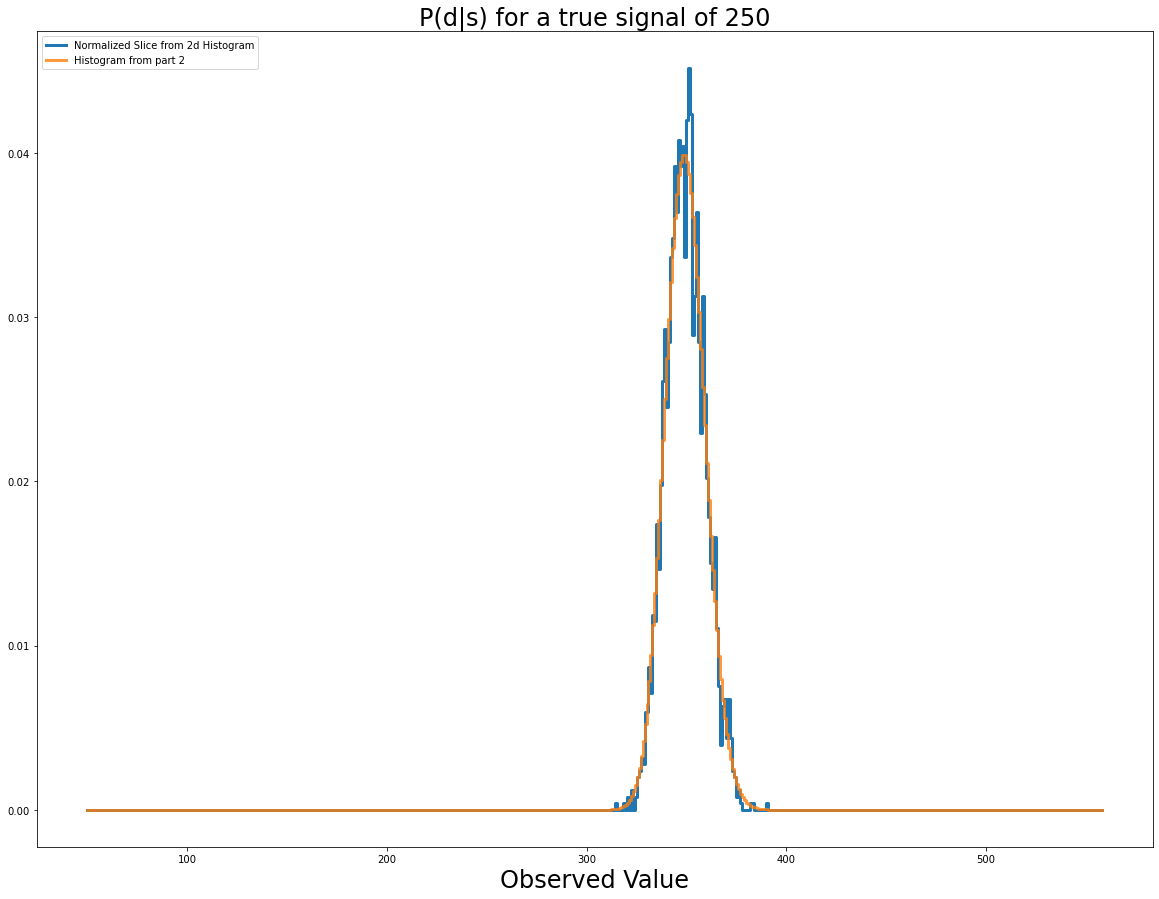

In [9]:
plt.step(temp[:-1],Psd[:,250]/np.sum(Psd[:,250]),Linewidth = 3,label = 'Normalized Slice from 2d Histogram')
plt.step(temp[:-1],stats.poisson.pmf(temp[:-1],100,loc=250),Linewidth = 3,alpha = 0.8, label = 'Histogram from part 2')
plt.title('P(d|s) for a true signal of 250', fontsize=24)
plt.xlabel('Observed Value', fontsize=24)
plt.legend(loc='upper left')
plt.show()

The histogram from plotted in problem 2, is a poisson distribution with a mean of 100, that is shifted up to being centered at 350, so if we plot the Normalized slice from the 2D histogram, with the probability mass function of a poisson distribution with a mean of 100 that is centered at 350, we can see that the general shapes match up very well. There is noise in the data, that causes it to not perfectly follow the poisson distribution near the mean, but the general shape matching up so closely is enough to report that they are effectively the same.

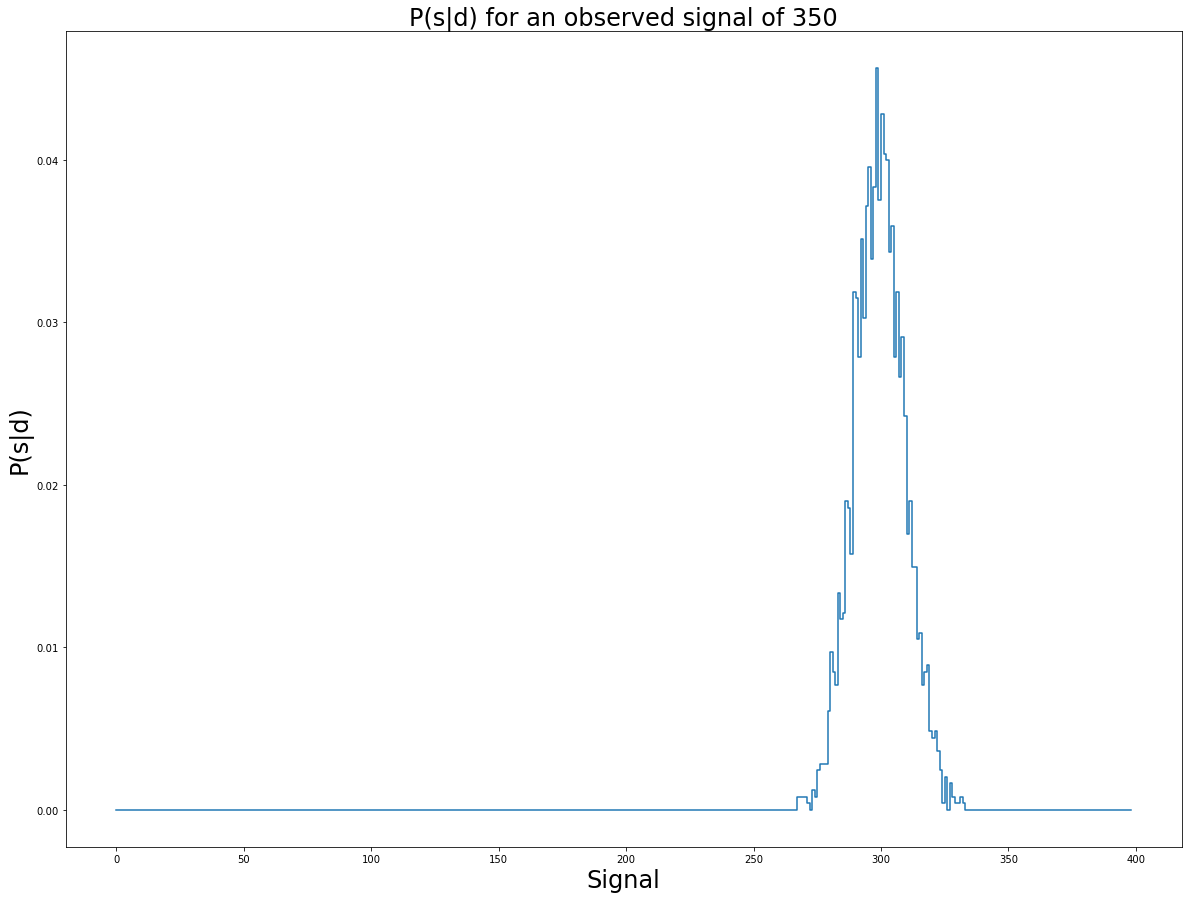

In [10]:
# Observed Value of 350
plt.step(temp2[:-1],Psd[350,:]/np.sum(Psd[350,:]))
plt.title('P(s|d) for an observed signal of ' + str(temp2[350]) ,fontsize = 24)
plt.xlabel('Signal',fontsize = 24)
plt.ylabel('P(s|d)', fontsize=24)
plt.show()

The plot above shows the P(s|d) for a given observed value in the data. This means that the histogram shows the probability of a true signal being a particular value when the observed data value is 350.

In [11]:
mean = np.sum(signalcenters*Psd[350,:]/np.sum(Psd[350,:]))
print("Mean:", mean)
upper = stats.poisson.ppf(stats.norm.cdf(1),mu=mean)
lower = stats.poisson.ppf(stats.norm.sf(1),mu=mean)
bound = upper-lower
print("1 sigma certainty that injected signal is between ", str(lower), ' ', str(upper))
print("1 sigma uncertainty is +/- ", str(bound/2))

Mean: 300.38615260395636
1 sigma certainty that injected signal is between  283.0   318.0
1 sigma uncertainty is +/-  17.5


Problem 3.D

The P(s|d) is symmetric, which does make sense, as the data follows a poisson distribution, and by extension the P(s|d) must also follow a poisson distribution. The mean of this distribution is also 300, and in the limit that the mean of a poisson distribution approaches infinity, the poisson takes the shape of a gaussian which is a symmetric distribution.

The distribution is also biased towards signal values being lower than what was observed in the data. This makes sense, as the observed data would include the signal value as well as the background. This would mean that the possible signal value would need to be smaller than the one observed in order for the observation to make sense.